<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center> <font color= #004A94> <font size = 6> Lic. Ingeniería Financiera </font> <br> <br> <font color= #AABCBB> <font size = 4>I.F. Karen Violeta García Hernandez - if707178@iteso.mx </font>

<center><font color=#50C8C4><font size=5> Laboratorio 1: Tading Manual </font> <br> <br>

<center> <font color= #004A94 > <font size = 4> Primavera 2020 </font>  |  <font color= #004A94> <font size = 4> Repositorio: <a href='https://github.com/violetarcia/LAB_0_KVGH.git'>Link</a></font>

---

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.2em;"> Resumen </span></div>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> En este laboratorio se dedicará a hacer trading manual </p>

---

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.2em;"> Código </span></div>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> A continuación se desglosa el código con el cual se analizan varias divisa. Primero se empieza importando paqueterías y archivos que nos serán útiles</p>

In [182]:
import funciones as fn                              # Para procesamiento de datos
import pandas as pd                                 # Procesamiento de datos
import matplotlib.pyplot as plt                     # Visualizar graficas básicas
import numpy as np
import seaborn as sns
import scipy.stats as st

In [169]:
# Lista de divisas que me gustaria analizar
instrument = ['EUR_USD', 'USD_JPY', 'EUR_JPY', 'AUD_USD', 'GBP_USD',
              'USD_CHF', 'AUD_JPY', 'CHF_HKD', 'EUR_AUD', 'GBP_SGD',
              'USD_CAD', 'EUR_CAD', 'CAD_CHF', 'SGD_HKD', 'AUD_CHF']
pd.set_option('display.max_rows', 8)

In [11]:
'''Función Divisa
         Obtener el precio de cierre de tal instrumento
         
         Sólo un parametro: el instrumento. (Ejem: 'EUR_USD')
        
        Para cambiar las fechas o temporalidad es necesario hacerlo desde la función
'''
def Divisa(ins):
    OA_Ak = '800f1b3f91d7cb0a713c532e17823f6d-f9acd6a21490f97aef649dfd8e723435'
    OA_Gn = "H1"                                                     # Granularidad
    fini = pd.to_datetime("2020-01-01 00:00:00").tz_localize('GMT')  # Fecha inicial
    ffin = pd.to_datetime("2020-02-08 00:00:00").tz_localize('GMT')  # Fecha final
    
    # Descargar precios masivos
    df = fn.f_precios_masivos(p0_fini=fini, p1_ffin=ffin, p2_gran=OA_Gn, p3_inst=ins, p4_oatk=OA_Ak, p5_ginc=4900)
    close = df['Close']
    
    return close


In [14]:
# Utilizar la funcion para la lista de divisas de las cuales se requieren los precios de cierre
data = list(map(Divisa, instrument))

list

# Precios

In [26]:
# Se acomoda la lista en un solo DataFrame
closes = pd.concat(data, axis = 1)
closes.columns = instrument

In [170]:
# En el siguiente DF estan los precios de cierre (cada hora) de lo que va del año (2020)
closes

,EUR_USD,USD_JPY,EUR_JPY,AUD_USD,GBP_USD,USD_CHF,AUD_JPY,CHF_HKD,EUR_AUD,GBP_SGD,USD_CAD,EUR_CAD,CAD_CHF,SGD_HKD,AUD_CHF
0,1.12152,108.686,121.883,0.70064,1.32514,0.96772,76.153,8.05136,1.60068,1.78334,1.29866,1.45642,0.74517,5.78936,0.67802
1,1.12189,108.726,121.985,0.70188,1.32502,0.96778,76.314,8.05204,1.59839,1.78248,1.29764,1.45573,0.74579,5.79268,0.67926
2,1.12184,108.702,121.956,0.70144,1.32566,0.96828,76.248,8.04846,1.59935,1.78324,1.29776,1.45582,0.74612,5.79344,0.67920
3,1.12209,108.673,121.948,0.70154,1.32560,0.96798,76.242,8.04943,1.59943,1.78432,1.29738,1.45574,0.74608,5.78855,0.67908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,1.09427,109.808,120.168,0.66766,1.29006,0.97767,73.316,7.94266,1.63896,1.79298,1.33039,1.45581,0.73486,5.58715,0.65276
644,1.09437,109.749,120.113,0.66746,1.28934,0.97742,73.254,7.94526,1.63962,1.79220,1.33022,1.45575,0.73480,5.58688,0.65238
645,1.09463,109.734,120.122,0.66773,1.28872,0.97729,73.272,7.94614,1.63936,1.79110,1.32991,1.45578,0.73486,5.58754,0.65256
646,1.09473,109.769,120.176,0.66774,1.28845,0.97751,73.299,7.94428,1.63943,1.79055,1.33020,1.45622,0.73488,5.58800,0.65272


In [31]:
# Calcular la matriz de coefecientes de correlacion
corr = closes.corr()

In [33]:
# Visualizarlo
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,EUR_USD,USD_JPY,EUR_JPY,AUD_USD,GBP_USD,USD_CHF,AUD_JPY,CHF_HKD,EUR_AUD,GBP_SGD,USD_CAD,EUR_CAD,CAD_CHF,SGD_HKD,AUD_CHF
EUR_USD,1,-0.22,0.6,0.87,0.55,-0.4,0.69,0.5,-0.65,-0.48,-0.88,-0.35,0.71,0.76,0.77
USD_JPY,-0.22,1,0.65,0.0046,-0.55,-0.044,0.43,-0.045,-0.17,-0.36,0.13,-0.059,-0.15,-0.023,-0.0082
EUR_JPY,0.6,0.65,1,0.69,-0.021,-0.35,0.89,0.36,-0.65,-0.68,-0.59,-0.32,0.43,0.58,0.6
AUD_USD,0.87,0.0046,0.69,1,0.39,-0.14,0.91,0.27,-0.94,-0.65,-0.93,-0.62,0.86,0.82,0.97
GBP_USD,0.55,-0.55,-0.021,0.39,1,-0.31,0.12,0.41,-0.22,0.14,-0.46,-0.13,0.33,0.47,0.32
USD_CHF,-0.4,-0.044,-0.35,-0.14,-0.31,1,-0.15,-0.97,-0.061,0.19,0.16,-0.25,0.24,-0.34,0.11
AUD_JPY,0.69,0.43,0.89,0.91,0.12,-0.15,1,0.23,-0.92,-0.74,-0.79,-0.59,0.71,0.73,0.87
CHF_HKD,0.5,-0.045,0.36,0.27,0.41,-0.97,0.23,1,-0.067,-0.25,-0.28,0.14,-0.11,0.47,0.023
EUR_AUD,-0.65,-0.17,-0.65,-0.94,-0.22,-0.061,-0.92,-0.067,1,0.67,0.82,0.72,-0.83,-0.74,-0.96
GBP_SGD,-0.48,-0.36,-0.68,-0.65,0.14,0.19,-0.74,-0.25,0.67,1,0.68,0.67,-0.59,-0.81,-0.6


In [246]:
resume_clos = closes.describe()
resume_clos

,EUR_USD,USD_JPY,EUR_JPY,AUD_USD,GBP_USD,USD_CHF,AUD_JPY,CHF_HKD,EUR_AUD,GBP_SGD,USD_CAD,EUR_CAD,CAD_CHF,SGD_HKD,AUD_CHF
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,1.108654,109.320652,121.198822,0.683395,1.305970,0.970063,74.709164,8.011747,1.622439,1.771100,1.311853,1.454340,0.739503,5.731113,0.662933
std,0.006219,0.641642,0.867728,0.008648,0.006601,0.003112,1.042701,0.026804,0.013456,0.013983,0.010391,0.005777,0.005946,0.052436,0.008358
min,1.094270,107.806000,119.872000,0.667120,1.288450,0.961980,72.428000,7.941650,1.598140,1.746820,1.296080,1.445800,0.726200,5.581860,0.644280
25%,1.102980,108.845000,120.338000,0.675030,1.301190,0.968205,73.753000,7.991535,1.613460,1.761005,1.304450,1.450160,0.735075,5.704690,0.656545
50%,1.109130,109.472000,121.034000,0.685930,1.305610,0.969980,75.030000,8.013380,1.618350,1.770520,1.307120,1.452680,0.739810,5.756300,0.664860
75%,1.113540,109.911000,121.955500,0.689860,1.310630,0.972610,75.685000,8.027265,1.630370,1.778980,1.320295,1.456895,0.745010,5.765890,0.668105
max,1.122240,110.262000,122.808000,0.701880,1.325660,0.977780,76.314000,8.080150,1.658960,1.803260,1.331460,1.470970,0.749740,5.793440,0.679420


In [256]:
# Linea de Regresion Lineal
def Regresion_L(x, y):
    z = np.polyfit(x, y, 1)
    y_hat = np.poly1d(z)(x)
    
    # Grafica
    ax.plot(x, y_hat, "r--")

    text = f"$y={z[0]:0.5f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
    ax.text(0, 0.99, text,transform=ax.transAxes, fontsize=8, verticalalignment='bottom')
    return z[0], z[1]


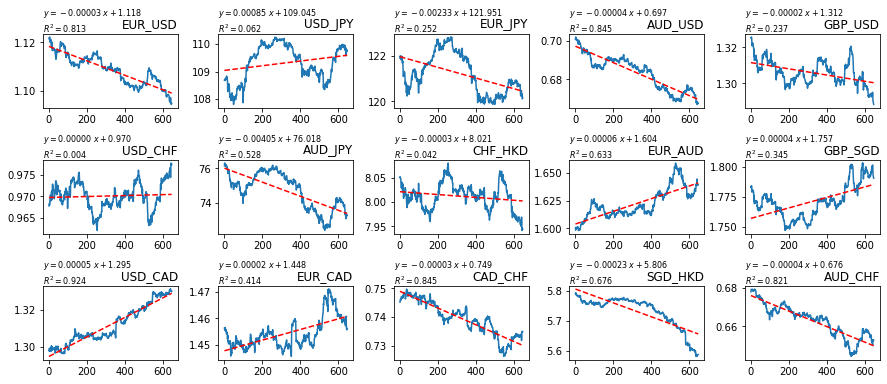

In [307]:
# Graficas

x = np.arange(len(closes))
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .7, wspace=.3)

data = np.arange(len(closes.columns))

m = np.arange(len(closes.columns), dtype='float64')
b = np.arange(len(closes.columns), dtype='float64')


for ax, d in zip(axs.ravel(), data):
    ax.plot(x, closes.iloc[:,d])
    m[d], b[d] = Regresion_L(x, closes.iloc[:,d])
    ax.set_title(instrument[d], loc = 'right')

In [308]:
np.set_printoptions(threshold=np.inf)
m

array([-2.999958e-05,  8.545039e-04, -2.328180e-03, -4.252656e-05,
       -1.720119e-05,  1.115251e-06, -4.052947e-03, -2.939066e-05,
        5.725837e-05,  4.395835e-05,  5.343593e-05,  1.988184e-05,
       -2.923168e-05, -2.305945e-04, -4.051590e-05])

In [300]:
temp = np.array(len(closes.columns))
temp([1.2])
type(temp([0]))

TypeError: 'numpy.ndarray' object is not callable

Las divisas que mejor se ajustan a una tendencia lineal son USD-CAD, CAD-CHF, AUD-USD y EUR-USD

# Rendimientos

In [45]:
# Rendimientos
def Returns(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

In [173]:
rend = [Returns(closes.iloc[:,i]) for i in range(len(closes.columns))]
rend = pd.concat(rend, axis = 1)

In [243]:
resume_rend = rend.describe()
resume_rend

,EUR_USD,USD_JPY,EUR_JPY,AUD_USD,GBP_USD,USD_CHF,AUD_JPY,CHF_HKD,EUR_AUD,GBP_SGD,USD_CAD,EUR_CAD,CAD_CHF,SGD_HKD,AUD_CHF
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,6.460000e+02,646.000000,646.000000,646.000000
mean,-0.000037,0.000015,-0.000022,-0.000074,-0.000043,0.000016,-0.000059,-0.000021,0.000037,0.000006,0.000037,-2.125889e-07,-0.000022,-0.000055,-0.000059
std,0.000500,0.000681,0.000758,0.000868,0.000930,0.000657,0.001249,0.000669,0.000822,0.000933,0.000526,6.086053e-04,0.000787,0.000487,0.001047
min,-0.003058,-0.004287,-0.003563,-0.003032,-0.004697,-0.002367,-0.005452,-0.003098,-0.005143,-0.004154,-0.001992,-3.162484e-03,-0.004614,-0.006209,-0.003451
25%,-0.000251,-0.000257,-0.000375,-0.000563,-0.000424,-0.000290,-0.000664,-0.000347,-0.000409,-0.000421,-0.000241,-2.751306e-04,-0.000392,-0.000231,-0.000556
50%,0.000000,0.000018,-0.000004,-0.000059,-0.000046,0.000052,-0.000054,-0.000051,0.000043,-0.000003,0.000038,2.067732e-05,-0.000027,-0.000016,-0.000046
75%,0.000224,0.000332,0.000354,0.000422,0.000398,0.000330,0.000548,0.000313,0.000495,0.000452,0.000290,2.698398e-04,0.000392,0.000176,0.000433
max,0.002360,0.003767,0.003578,0.004361,0.003989,0.003111,0.005892,0.002162,0.002498,0.005748,0.004760,4.940053e-03,0.003498,0.001244,0.004898


In [175]:
cor = rend.corr()
cor.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,EUR_USD,USD_JPY,EUR_JPY,AUD_USD,GBP_USD,USD_CHF,AUD_JPY,CHF_HKD,EUR_AUD,GBP_SGD,USD_CAD,EUR_CAD,CAD_CHF,SGD_HKD,AUD_CHF
EUR_USD,1,-0.2,0.48,0.37,0.5,-0.64,0.15,0.62,0.21,0.36,-0.3,0.56,-0.34,0.26,-0.093
USD_JPY,-0.2,1,0.76,0.29,-0.042,0.51,0.75,-0.5,-0.43,-0.16,-0.11,-0.26,0.5,0.23,0.56
EUR_JPY,0.48,0.76,1,0.51,0.29,0.032,0.77,-0.031,-0.25,0.098,-0.3,0.14,0.23,0.38,0.44
AUD_USD,0.37,0.29,0.51,1,0.31,-0.079,0.85,0.085,-0.83,0.047,-0.45,-0.08,0.23,0.51,0.78
GBP_USD,0.5,-0.042,0.29,0.31,1,-0.34,0.19,0.34,-0.02,0.87,-0.3,0.15,-0.083,0.25,0.042
USD_CHF,-0.64,0.51,0.032,-0.079,-0.34,1,0.22,-0.98,-0.31,-0.31,0.13,-0.41,0.75,-0.049,0.56
AUD_JPY,0.15,0.75,0.77,0.85,0.19,0.22,1,-0.21,-0.81,-0.051,-0.37,-0.2,0.43,0.48,0.85
CHF_HKD,0.62,-0.5,-0.031,0.085,0.34,-0.98,-0.21,1,0.29,0.31,-0.13,0.4,-0.74,0.098,-0.55
EUR_AUD,0.21,-0.43,-0.25,-0.83,-0.02,-0.31,-0.81,0.29,1,0.17,0.3,0.43,-0.45,-0.38,-0.88
GBP_SGD,0.36,-0.16,0.098,0.047,0.87,-0.31,-0.051,0.31,0.17,1,-0.12,0.19,-0.18,-0.24,-0.16


## Histogramas

In [188]:
def Normal(y):
    x = np.linspace(min(y),max(y), len(y))
    param = st.norm.fit(y)
    pdf_fitted = st.norm.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    
    #Graficas
    ax.plot(x,pdf_fitted)


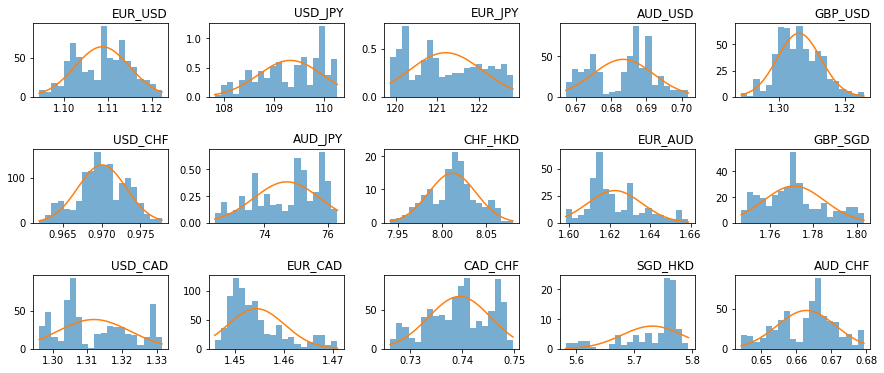

In [235]:
# Graficas
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .7, wspace=.3)

data = np.arange(len(rend.columns))

for ax, d in zip(axs.ravel(), data):
    ax.hist(closes.iloc[:,d], bins = 20, density = True, alpha = 0.6)
    Normal(closes.iloc[:,d])
    ax.set_title(instrument[d], loc = 'right')

In [242]:
def Normal_Test(y, name):
    s,p = st.mstats.normaltest(y)
    print("p value for " + name + " = "+str(p))
    return p
normp_clo = [Normal_Test(closes.iloc[:,i], instrument[i]) for i in range(len(rend.columns))]

p value for EUR_USD = 3.693333851983263e-15
p value for USD_JPY = 2.328759782255359e-33
p value for EUR_JPY = 6.144575820057832e-188
p value for AUD_USD = 1.0417215586525282e-37
p value for GBP_USD = 0.01850152882854949
p value for USD_CHF = 0.01097335880782378
p value for AUD_JPY = 8.966689513132187e-40
p value for CHF_HKD = 0.05502267238770405
p value for EUR_AUD = 1.8852200335373082e-11
p value for GBP_SGD = 1.1507100049277282e-07
p value for USD_CAD = 1.4769308754090933e-69
p value for EUR_CAD = 2.86927105312843e-23
p value for CAD_CHF = 2.36278060684834e-14
p value for SGD_HKD = 3.4101890050636015e-31
p value for AUD_CHF = 1.0060522826040642e-05


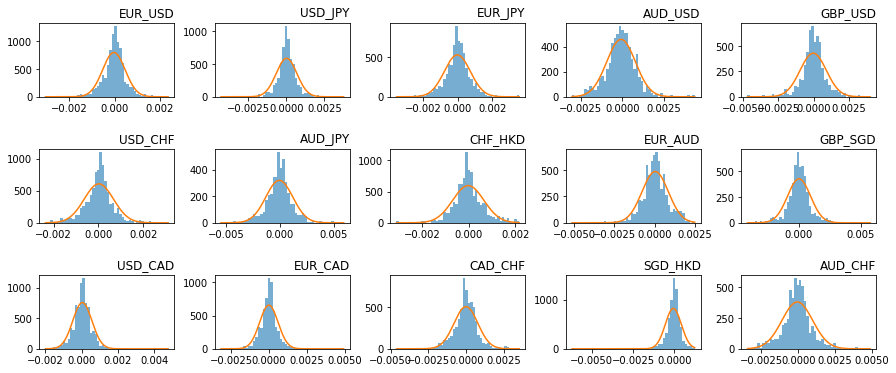

In [189]:
# Graficas
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .7, wspace=.3)

data = np.arange(len(rend.columns))

for ax, d in zip(axs.ravel(), data):
    ax.hist(rend.iloc[:,d], bins = 50, density = True, alpha = 0.6)
    Normal(rend.iloc[:,d])
    ax.set_title(instrument[d], loc = 'right')

In [241]:
normp_rend = [Normal_Test(rend.iloc[:,i], instrument[i]) for i in range(len(rend.columns))]

p value for EUR_USD = 2.318390900362274e-21
p value for USD_JPY = 8.237059865193369e-34
p value for EUR_JPY = 1.1933356928100015e-13
p value for AUD_USD = 1.3162293238934751e-08
p value for GBP_USD = 1.7181628594927698e-20
p value for USD_CHF = 1.5737689432707984e-11
p value for AUD_JPY = 1.4725052322042073e-11
p value for CHF_HKD = 4.070148575553042e-11
p value for EUR_AUD = 3.237982382316003e-22
p value for GBP_SGD = 3.964377046905811e-17
p value for USD_CAD = 9.854795647714205e-51
p value for EUR_CAD = 9.104745332175652e-37
p value for CAD_CHF = 3.211171804327885e-14
p value for SGD_HKD = 8.54465486644064e-133
p value for AUD_CHF = 2.0365771528159858e-16


In [309]:
# Definimos la tabla donde se mostrarán los resultados

df = pd.DataFrame(index=instrument, columns = ['Media_P', 'DesvEst_P', 'Pendiente', 'Intercepto', 
                                               'Normal_test_P', 'Media_R', 'DesvEst_R', 'Normal_test_R'], dtype='float')


# Mostramos los resultados en la tabla previamente creada

df['Media_P'] = (resume_clos.loc['mean'])
df['DesvEst_P'] = resume_clos.loc['std']

df['Pendiente'] = m
df['Intercepto'] = b

df['Normal_test_P'] = normp_clo

df['Media_R'] = resume_rend.loc['mean']
df['DesvEst_R'] = resume_rend.loc['std']

df['Normal_test_R'] = normp_rend

df

,Media_P,DesvEst_P,Pendiente,Intercepto,Normal_test_P,Media_R,DesvEst_R,Normal_test_R
EUR_USD,1.108654,0.006219,-0.000030,1,3.693334e-15,-3.742593e-05,0.000500,2.318391e-21
USD_JPY,109.320652,0.641642,0.000855,109,2.328760e-33,1.534856e-05,0.000681,8.237060e-34
EUR_JPY,121.198822,0.867728,-0.002328,121,6.144576e-188,-2.183318e-05,0.000758,1.193336e-13
AUD_USD,0.683395,0.008648,-0.000043,0,1.041722e-37,-7.445097e-05,0.000868,1.316229e-08
...,...,...,...,...,...,...,...,...
EUR_CAD,1.454340,0.005777,0.000020,1,2.869271e-23,-2.125889e-07,0.000609,9.104745e-37
CAD_CHF,0.739503,0.005946,-0.000029,0,2.362781e-14,-2.152502e-05,0.000787,3.211172e-14
SGD_HKD,5.731113,0.052436,-0.000231,5,3.410189e-31,-5.479924e-05,0.000487,8.544655e-133
AUD_CHF,0.662933,0.008358,-0.000041,0,1.006052e-05,-5.886771e-05,0.001047,2.036577e-16


# Sharpe

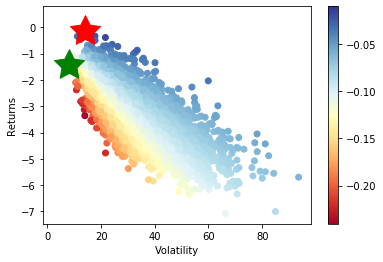

In [414]:

data = rend*24*30*252
 
n = len(data.columns)
mean = data.mean()
cov_matrix = data.cov()

num = 5000
results = np.zeros((num, 3+n))

for i in range(num):
    w = np.array(np.random.random(n))
    w /= np.sum(w)
    results[i, 3:] = np.round(w, 3)*100
    results[i, 0] = np.sum(mean * w) 
    results[i, 1] = np.dot(np.dot(w.T, cov_matrix), w)/100
    results[i, 2] = results[i,0] / results[i,1]

results_frame = pd.DataFrame(results, columns=['ret','stdev','sharpe'] + instrument)
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [413]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(max_sharpe_port)

ret         0.122904
stdev      22.344058
sharpe      0.005501
EUR_USD     0.400000
USD_JPY    12.500000
EUR_JPY     9.700000
AUD_USD     0.200000
GBP_USD     5.500000
USD_CHF    11.200000
AUD_JPY     0.700000
CHF_HKD     3.200000
EUR_AUD     7.000000
GBP_SGD    11.800000
USD_CAD    10.400000
EUR_CAD    13.100000
CAD_CHF    11.100000
SGD_HKD     0.400000
AUD_CHF     2.800000
Name: 606, dtype: float64
